<a href="https://colab.research.google.com/github/gustavopierre/data_science_portfolio/blob/master/Um_Passo_a_Passo_Para_Analise_Crimes_na_Irlanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![author](https://github.com/gustavopierre/data_science_portfolio/blob/master/author-gustavopierre.png?raw=true)](https://www.linkedin.com/in/gustavo_pierre) [![](https://img.shields.io/badge/python-3.7+-blue.svg)](https://www.python.org/downloads/release/python-365/) [![contributions welcome](https://img.shields.io/badge/contributions-welcome-brightgreen.svg?style=flat)](hhttps://github.com/gustavopierre/data_science_portfolio/issues)

<p align="center">
  <img src="https://github.com/gustavopierre/data_science_portfolio/blob/master/garda_hq.jpg?raw=true" alt="Garda Síochána" >
</p>

# **Um Passo a Passo para Análise dos Crimes na Irlanda**
-----
A República da Irlanda é um estado soberano da Europa, cuja capital é Dublin. Considerado um país desenvolvido, tem o terceiro Índice de Desenvolvimento Humano (IDH) do mundo e ótimas classificações em índices que medem o grau de democracia e liberdades como a de imprensa, econômica e política. <br>
No entanto, a Irlanda já foi um dos países mais pobres da Europa. Apresentou uma rápida expansão da economia a partir do final da década de 80, principalmente de 1995 a 2007. A partir de 2008 sofreu uma crise financeira sem precedentes. No entanto, a economia irlandesa voltou a crescer a partir de 2012 e, em 2017, cresceu três vezes mais que qualquer outro país europeu.<br>
Este projeto tem como tema apresentar um passo a passo bara a busca de informações relativas aos crimes ocorridos na Irlanda com base em dados obtidos na internet. <br>
O policiamento na Irlanda é provido pela *Garda Síochána* (Guarda da Paz), que é a força policial civil da República da Irlanda, com atribuições de polícia judiciária e polícia preventiva uniformizada. Tem a sua Central de Polícia localizada em Dublin, em Phoenix Park. Sua atuação operacional divide o país em quatro regiões policiais, estas divididas em 28 Divisões. Estas divisões estão em fase de redução para 19 com a fusão de algumas regiões.<br>
Como segundo trabalho do Curso de Ciência de Dados, vamos seguir um passo a passo para obter informações sobre os crimes na Irlanda abrangendo as etapas de obtenção dos dados, análise exploratória dos mesmos e exibição das informações relativas à eles.

## **Obtenção dos Dados**
### **A Busca**
Tendo a tarefa definida de analisar os crimes na Irlanda, iniciamos a busca pelos dados.Esta é uma parte importante neste processo. Os primeiros sites procurados foram os [Escritório Central de Estatísticas (Central Statistics Office - CSO)](https://www.cso.ie/en/index.html) e [Portal de Dados Abertos da Irlanda](https://data.gov.ie/), ambos possuem uma séries de conjunto de dados sobre diversos temas referentes à Irlanda, inclusive dados de geometria de áreas. Apesar da ênfase nas buscas ter sido nesses dois sites, a busca por outros sites na internet foi realizada, mas nada relevante foi encontrado ou terminava em subdomínios do site do CSO. <br>
### **Que Dados Escolher?**
Em virtude da existência de diversos conjuntos de dados de crimes fornecidos pela CSO, foi decidido utilizar o conjunto de dados que fornecesse a melhor combinação de três fatores: detalhamento do tipo de crime, área de atuação da *Garda* e a divisão dos dados no tempo. Desejávamos os dados em que os tipos de crimes estivessem mais especificados. A *Garda* começou a dividir os crimes por tipos na década de 20 e vem evoluindo esta classificação ao longo do tempo. O Sistema Irlandês de Classificação de Crimes ([ICCS - Irish Crime Classification System](https://www.cso.ie/en/media/csoie/releasespublications/documents/crimejustice/current/crimeclassification.pdf)) divide os crimes em 16 tipos mais genéricos e, dentro destes, tipos mais específicos, cada um com seu código específico. Quanto ao fator distribuição geográfica, buscamos a informação que pudesse nos fornecer um dado referente às cidades. Este fator geográfico implicaria também na escolha dos dados geométricos das áreas analisadas para uma possível visualização em um mapa. O terceiro e último fator, era a divisão dos dados no tempo. Quanto mais específico, melhor seria para uma boa análise. <br> 
Decidimos por usar os dados da *Garda Síochána* dos tipos de crimes mais especificados, divididos por divisões operacionais e por quadrimestre de 2003 até o primeiro quadrimestre de 2020. Para possibilitar a visualização espacial e geograficamente distribuída dos dados, buscamos dados que delimitam estas divisões, que foram encontradas no site do [Censo de 2011](https://www.cso.ie/en/census/census2011boundaryfiles/). 
Foi obtido um [arquivo de dados de crimes](https://raw.githubusercontent.com/gustavopierre/data_science_portfolio/master/crimes_irlanda.csv), no formato de valores separados por vírgula (csv), e um arquivo compactado com os arquivos necessários para os [limites geográficos das referidas divisões operacionais](https://github.com/gustavopierre/data_science_portfolio/blob/master/Census2011_Garda_Divisions_Nov2013.zip?raw=true).<br>
Uma outra informação útil é a [população da Irlanda](https://raw.githubusercontent.com/gustavopierre/data_science_portfolio/master/population_ireland.csv) desde o ano de 2003, quando começam os dados do crime e esta informação encontramos também num [site da CSO referente à população](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=PEA11&PLanguage=0), também no formato de valores separados por vígula (csv) .


## **Configuração do Ambiente**
Para a carregamento, análise e exploração dos dados, usaremos Python. Para seu uso, serão necessárias as seguintes bibliotecas de funções que serão importadas para o ambiente:

* Pandas - uma biblioteca de uso fácil, que permite ao usuário explorar, manipular e visualizar os dados de um modo bastante eficiente;
* Numpy - uma biblioteca usada, principalmente, para realizar cálculos em vetores multidimensionais;
* Matplotlib - uma biblioteca para visualização de dados;
* Geopandas - é um projeto open source que foi criado para tornar a manipulação de dados geoespaciais no Python uma tarefa mais simples; e
* Descartes - é uma biblioteca necessária para plotar polígonos em geopandas.<br>
Iniciamos o código instalando o Geopandas e Descartes que, por padrão, não vêm instalados no Google Colab.

In [ ]:
print("Installing geopandas...")
!pip install --upgrade geopandas
print("Installing descartes...")
!pip install descartes

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
sns.set() # notebook
pd.options.mode.chained_assignment = None;

##**Análise e Exploração dos Dados**
Como dito antes, os dados são oriundos de três arquivos, um com a geometria das áreas, outro da população da Irlanda por ano, outro com os dados dos crimes por área ao longo do tempo. Vamos analisá-los separadamente quanto ao número e tipo dos campos, número de registros e a qualidade destes. Logo a frente veremos que não são exatamente três arquivos somente.



### **Arquivo com a Geometria das Divisões**
A geometria disponível da área é no formato shapefile e é composto de quatro arquivos que, combinados, geram a informação da geometria. O carregamento desta é feito através do [arquivo com extensão SHP](https://github.com/gustavopierre/data_science_portfolio/blob/master/Census2011_Garda_Divisions_Nov2013.zip?raw=true). Vamos ler o arquivo e analisar os dados constantes nele, inclusive uma visualização prévia da geometria.


<img src="https://github.com/gustavopierre/data_science_portfolio/blob/master/garda_divisions.png?raw=true" alt="Garda Divisions" width=400>

<img src="https://github.com/gustavopierre/data_science_portfolio/blob/master/DMR_garda_divisions.png?raw=true" alt="DMR Garda Divisions" width=400>

In [186]:
shapefile = gpd.read_file('/content/Census2011_Garda_Divisions_Nov2013.shp')
#shapefile = gpd.read_file('./Um_Passo_a_Passo_para_Analise_Crimes_Irlanda/Census2011_Garda_Divisions_Nov2013.shp')
shapefile.head(3)

,REGION,REG_CODE,DIVISION,DIV_CODE,GEOGID,Male2011,Female2011,Total2011,PPOcc2011,Unocc2011,Vacant2011,HS2011,PCVac2011,CREATEDBY,CREATEDATE,geometry
0,Western Region,02,Galway,0223,K0223,124859.0,125986.0,250845.0,89385.0,21911.0,18823.0,111296.0,16.9,Paul Creaner,30-11-2013,"POLYGON ((202234.404 219542.771, 202195.208 21..."
1,Dublin Metropolitan Region,06,DMR East,0605,K0605,91205.0,99513.0,190718.0,70764.0,8933.0,6229.0,79697.0,7.8,Paul Creaner,30-11-2013,"POLYGON ((320587.313 230164.757, 320666.241 23..."
2,Dublin Metropolitan Region,06,DMR North,0607,K0607,160449.0,171156.0,331605.0,119210.0,12896.0,9651.0,132106.0,7.3,Paul Creaner,30-11-2013,"POLYGON ((316466.866 266374.324, 316474.719 26..."


In [187]:
print(f'Número de registros: {shapefile.shape[0]}')
print(f'Número de campos: {shapefile.shape[1]}')

Número de registros: 28
Número de campos: 16


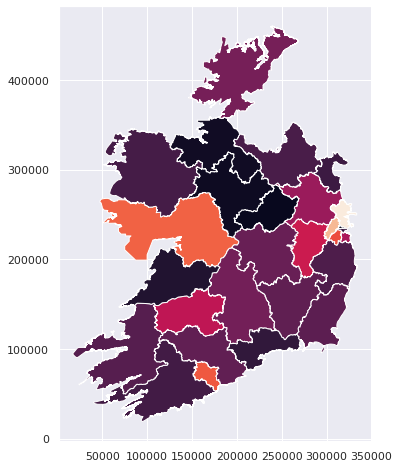

In [188]:
shapefile.plot(column='Total2011', figsize=(16,8));

In [189]:
shapefile.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   REGION      28 non-null     object  
 1   REG_CODE    28 non-null     object  
 2   DIVISION    28 non-null     object  
 3   DIV_CODE    28 non-null     object  
 4   GEOGID      28 non-null     object  
 5   Male2011    28 non-null     float64 
 6   Female2011  28 non-null     float64 
 7   Total2011   28 non-null     float64 
 8   PPOcc2011   28 non-null     float64 
 9   Unocc2011   28 non-null     float64 
 10  Vacant2011  28 non-null     float64 
 11  HS2011      28 non-null     float64 
 12  PCVac2011   28 non-null     float64 
 13  CREATEDBY   28 non-null     object  
 14  CREATEDATE  28 non-null     object  
 15  geometry    28 non-null     geometry
dtypes: float64(8), geometry(1), object(7)
memory usage: 3.6+ KB


Podemos observar que existem 28 registros, um para cada divisão. Não existem valores nulos e temos 16 colunas. Cada coluna refere-se à:
* REGION - nome da região operativa da *Garda* a que pertence aquela divisão;
* REG_COD - código da Região;
* DIVISION - nome da divisão da *Garda*;
* DIV_CODE - código da divisão;
* GEOGID - identificador da geografia;
* Male2011, Female2011, Total2011 - respectivamente as quantidades de homens, mulheres e população de cada área da divisão;
* PPOcc2011 - domicílios particulares permanentes;
* Unocc2011 - o total de habitações desocupadas no Censo;
* Vacant2011 - total de habitações vagas;
* HS2011 - total de habitações;
* PCVac2011 - taxa de desocupação;
* CREATEDBY e CREATEDATE - autor e data de criação do registro;
* geometry - a geometria da divisão.<br>
Os dados oriundos do censo de 2011 e de autoria não serão usados neste projeto, portanto, nós apagaremos essas colunas.

In [190]:
shapefile = shapefile.drop(columns=['Male2011','Female2011','Female2011', 'Total2011','PPOcc2011', 'Unocc2011', 'Vacant2011', 'HS2011','PCVac2011'])
shapefile.head(3)

,REGION,REG_CODE,DIVISION,DIV_CODE,GEOGID,CREATEDBY,CREATEDATE,geometry
0,Western Region,02,Galway,0223,K0223,Paul Creaner,30-11-2013,"POLYGON ((202234.404 219542.771, 202195.208 21..."
1,Dublin Metropolitan Region,06,DMR East,0605,K0605,Paul Creaner,30-11-2013,"POLYGON ((320587.313 230164.757, 320666.241 23..."
2,Dublin Metropolitan Region,06,DMR North,0607,K0607,Paul Creaner,30-11-2013,"POLYGON ((316466.866 266374.324, 316474.719 26..."


### **Arquivo da População da Irlanda**
Ao tentar ler o arquivo de populações direto com o pandas, o seguinte erro é observado:<br>
<br>
![Erro ao carregar o arquivo](https://github.com/gustavopierre/data_science_portfolio/blob/master/error.png?raw=true)
<br>
Após a visualização dos dados em uma planilha ou editor de textos, vê-se que as três primeiras linhas são desnecessárias. 

![texto alternativo](https://github.com/gustavopierre/data_science_portfolio/blob/master/population_ireland_csv.gif?raw=true)

Descartaremos as três primeiras linhas na leitura do arquivo, visualizando o início e fim dos dados. Em seguida, vamos analisar seus registros e colunas, visualizando-os e verificando se existem dados nulos. 

In [191]:
# lendo o arquivo de população a partir da quarta linha
population = pd.read_csv('https://raw.githubusercontent.com/gustavopierre/data_science_portfolio/master/population_ireland.csv', skiprows=3)
#population = pd.read_csv('./Um_Passo_a_Passo_para_Analise_Crimes_Irlanda/population_ireland.csv', skiprows=3)
# exibindo os valores das primeiras cinco linhas do DataFrame
population.head()

,,.1,Both sexes
0,All ages,NaN,NaN
1,,1926.0,2971992.0
2,,1936.0,2968420.0
3,,1946.0,2955107.0
4,,1951.0,2960593.0


In [192]:
# exibindo os valores das últimas cinco linhas do DataFrame
population.tail()

,,.1,Both sexes
32,,2016.0,4739597.0
33,,2017.0,4792490.0
34,,2018.0,4857015.0
35,,2019.0,4921496.0
36,"Preliminary figures used for 2017, 2018 and 20...",NaN,NaN


In [193]:
print(f'Número de registros: {population.shape[0]}')
print(f'Número de campos: {population.shape[1]}')

Número de registros: 37
Número de campos: 3


In [194]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0               37 non-null     object 
 1    .1         35 non-null     float64
 2   Both sexes  35 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


Observando os dados acima, temos 3 colunas e 37 registros, sendo que a primeira coluna, sem nome, é desnecessária. a primeira e a última linhas também. As duas outras colunas se referem ao ano e a população naquele ano.<br>
É possível observar também que os nomes das colunas não são claros e que os tipos das colunas referente ao ano e à população não são do tipo inteiro. <br>
Após esta rápida análise, as seguintes tarefas devem ser realizadas nos dados da população:
*   Apagar a primeira coluna;
*   Apagar o primeiro e último registros, que são os registros que possuem os campos de ano e população nulos;
*   Alterar os nomes das colunas; e
*   Alterar os tipos dos dados das colunas.





#### **1. Apagando a primeira coluna**







In [195]:
# apagando a primeira coluna
population.drop(population.columns[0], axis=1, inplace=True)
population.head()

,.1,Both sexes
0,NaN,NaN
1,1926.0,2971992.0
2,1936.0,2968420.0
3,1946.0,2955107.0
4,1951.0,2960593.0


#### **2. Apagando o primeiro e último registros**

In [196]:
# apagando o primeiro e último registros
population.dropna(inplace=True)
# exibindo os primeiros cinco registros
population.head()

,.1,Both sexes
1,1926.0,2971992.0
2,1936.0,2968420.0
3,1946.0,2955107.0
4,1951.0,2960593.0
5,1961.0,2818341.0


In [197]:
# exibindo os últimos cinco registros
population.tail()

,.1,Both sexes
31,2015.0,4687787.0
32,2016.0,4739597.0
33,2017.0,4792490.0
34,2018.0,4857015.0
35,2019.0,4921496.0


#### **3. Alterando os nomes das colunas**

In [198]:
print(f'Nome das colunas antes:{population.columns.to_list()}')
# alterando os nomes dos campos
population.columns = ['year', 'population']
print(f'Nome das colunas depois:{population.columns.to_list()}')
# exibindo os cinco primeiros registros
population.head()

Nome das colunas antes:[' .1', 'Both sexes']
Nome das colunas depois:['year', 'population']


,year,population
1,1926.0,2971992.0
2,1936.0,2968420.0
3,1946.0,2955107.0
4,1951.0,2960593.0
5,1961.0,2818341.0


#### **4. Alterando os tipos dos dados das colunas para inteiro**

In [199]:
#alterando o tipo dos campos year e population
population = population.astype(int)
# exibindo os tipos dos campos
population.dtypes

year          int64
population    int64
dtype: object

In [200]:
# exibindo os cinco primeiros registros
population.head()

,year,population
1,1926,2971992
2,1936,2968420
3,1946,2955107
4,1951,2960593
5,1961,2818341


### **Arquivo dos Dados de Crimes**
Como no arquivo da população, o arquivo de ocorrência de crimes também exibiu erro:<br>
<br>
![Erro ao carregar o arquivo](https://github.com/gustavopierre/data_science_portfolio/blob/master/error.png?raw=true)
<br>
Abrindo o arquivo em uma planilha ou editor de texto, o mesmo problema foi identificado, portanto, descartaremos as três primeiras linhas na leitura do arquivo.

![texto alternativo](https://github.com/gustavopierre/data_science_portfolio/blob/master/crimes_ireland_csv.gif?raw=true)

Lendo o arquivo a partir da quarta linha e visualizando os três registros iniciais e os três finais.

In [201]:
# lendo o arquivo de crimes a partir da quarta linha
df = pd.read_csv('https://raw.githubusercontent.com/gustavopierre/data_science_portfolio/master/crimes_irlanda.csv', skiprows=3)
#df = pd.read_csv('./Um_Passo_a_Passo_para_Analise_Crimes_Irlanda/crimes_irlanda.csv', skiprows=3)
# exibindo os valores das primeiras três linhas do DataFrame
df.head(3)

,,.1,"01 ,Homicide offences","0111 ,Murder","0112 ,Manslaughter","0113 ,Infanticide","012 ,Dangerous driving leading to death","02 ,Sexual offences","021 ,Rape and sexual assault","022 ,Other sexual offences","03 ,Attempts/threats to murder, assaults, harassments and related offences","0311 ,Murder-attempt","0312 ,Murder-threat","033 ,Harassment and related offences","034 ,Assault causing harm, poisoning","035 ,Other assault","04 ,Dangerous or negligent acts","0411 ,Dangerous driving causing serious bodily harm","0412 ,Driving/in charge of a vehicle while over legal alcohol limit","0413 ,Driving/in charge of a vehicle under the influence of drugs","0421 ,Endangerment with potential for serious harm/death","0422 ,Abandoning a child, child neglect and cruelty","0423 ,Unseaworthy/dangerous use of boat or ship","0424 ,False alarm/interference with aircraft or air transport facilities","0425 ,Endangering traffic offences","05 ,Kidnapping and related offences","0511 ,False imprisonment","0512 ,Abduction of person under 16 years of age","0513 ,Human trafficking offences","06 ,Robbery, extortion and hijacking offences","0611 ,Robbery of an establishment or institution","0612 ,Robbery of cash or goods in transit","0613 ,Robbery from the person","0621 ,Blackmail or extortion","0631 ,Carjacking, hijacking/unlawful seizure of aircraft/vessel","07 ,Burglary and related offences","0711 ,Aggravated burglary","0712 ,Burglary (not aggravated)","0713 ,Possession of an article (with intent to burgle, steal, demand)","08 ,Theft and related offences","081 ,Theft/taking of vehicle and related offences","0821 ,Theft from person","0822 ,Theft from shop","084 ,Other thefts, handling stolen property","09 ,Fraud, deception and related offences","10 ,Controlled drug offences","1011 ,Importation of drugs","1012 ,Cultivation or manufacture of drugs","1021 ,Possession of drugs for sale or supply","1022 ,Possession of drugs for personal use","103 ,Other drug offences","11 ,Weapons and Explosives Offences","111 ,Explosives, chemical weapons offences","1121 ,Discharging a firearm","1122 ,Possession of a firearm","113 ,Offensive weapons offences (n.e.c.)","114 ,Fireworks offences","12 ,Damage to property and to the environment","1211 ,Arson","1212 ,Criminal damage (not arson)","1221 ,Litter offences","13 ,Public order and other social code offences","131 ,Disorderly conduct","132 ,Trespass offences","133 ,Liquor licensing offences","134 ,Prostitution offences","135 ,Regulated betting/money, collection/trading offences","136 ,Social code offences (n.e.c.)","15 ,Offences against government, justice procedures and organisation of crime","151 ,Offences against government and its agents","152 ,Organisation of crime and conspiracy to commit crime","153 ,Perverting the course of justice","157 ,Offences while in custody, breach of court orders"
0,2003Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,"11 ,Cavan/Monaghan Garda Division",1.0,0.0,0.0,0.0,1.0,24.0,24.0,0.0,128.0,0.0,0.0,13.0,21.0,94.0,125.0,1.0,119.0,1.0,0.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,136.0,0.0,136.0,0.0,248.0,42.0,20.0,45.0,141.0,33.0,26.0,0.0,0.0,11.0,15.0,0.0,6.0,0.0,0.0,1.0,5.0,0.0,145.0,5.0,139.0,1.0,243.0,199.0,6.0,34.0,0.0,0.0,4.0,32.0,1.0,0.0,1.0,30.0
2,,"12 ,Donegal Garda Division",1.0,0.0,0.0,0.0,1.0,34.0,33.0,1.0,215.0,0.0,1.0,38.0,49.0,127.0,87.0,0.0,83.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,3.0,0.0,3.0,0.0,0.0,112.0,0.0,112.0,0.0,287.0,43.0,16.0,41.0,187.0,19.0,78.0,0.0,1.0,11.0,58.0,8.0,8.0,0.0,2.0,3.0,3.0,0.0,298.0,13.0,285.0,0.0,352.0,287.0,7.0,46.0,0.0,0.0,12.0,19.0,4.0,0.0,4.0,11.0


In [202]:
# exibindo os valores das últimas três linhas do DataFrame
df.tail(3)

,,.1,"01 ,Homicide offences","0111 ,Murder","0112 ,Manslaughter","0113 ,Infanticide","012 ,Dangerous driving leading to death","02 ,Sexual offences","021 ,Rape and sexual assault","022 ,Other sexual offences","03 ,Attempts/threats to murder, assaults, harassments and related offences","0311 ,Murder-attempt","0312 ,Murder-threat","033 ,Harassment and related offences","034 ,Assault causing harm, poisoning","035 ,Other assault","04 ,Dangerous or negligent acts","0411 ,Dangerous driving causing serious bodily harm","0412 ,Driving/in charge of a vehicle while over legal alcohol limit","0413 ,Driving/in charge of a vehicle under the influence of drugs","0421 ,Endangerment with potential for serious harm/death","0422 ,Abandoning a child, child neglect and cruelty","0423 ,Unseaworthy/dangerous use of boat or ship","0424 ,False alarm/interference with aircraft or air transport facilities","0425 ,Endangering traffic offences","05 ,Kidnapping and related offences","0511 ,False imprisonment","0512 ,Abduction of person under 16 years of age","0513 ,Human trafficking offences","06 ,Robbery, extortion and hijacking offences","0611 ,Robbery of an establishment or institution","0612 ,Robbery of cash or goods in transit","0613 ,Robbery from the person","0621 ,Blackmail or extortion","0631 ,Carjacking, hijacking/unlawful seizure of aircraft/vessel","07 ,Burglary and related offences","0711 ,Aggravated burglary","0712 ,Burglary (not aggravated)","0713 ,Possession of an article (with intent to burgle, steal, demand)","08 ,Theft and related offences","081 ,Theft/taking of vehicle and related offences","0821 ,Theft from person","0822 ,Theft from shop","084 ,Other thefts, handling stolen property","09 ,Fraud, deception and related offences","10 ,Controlled drug offences","1011 ,Importation of drugs","1012 ,Cultivation or manufacture of drugs","1021 ,Possession of drugs for sale or supply","1022 ,Possession of drugs for personal use","103 ,Other drug offences","11 ,Weapons and Explosives Offences","111 ,Explosives, chemical weapons offences","1121 ,Discharging a firearm","1122 ,Possession of a firearm","113 ,Offensive weapons offences (n.e.c.)","114 ,Fireworks offences","12 ,Damage to property and to the environment","1211 ,Arson","1212 ,Criminal damage (not arson)","1221 ,Litter offences","13 ,Public order and other social code offences","131 ,Disorderly conduct","132 ,Trespass offences","133 ,Liquor licensing offences","134 ,Prostitution offences","135 ,Regulated betting/money, collection/trading offences","136 ,Social code offences (n.e.c.)","15 ,Offences against government, justice procedures and organisation of crime","151 ,Offences against government and its agents","152 ,Organisation of crime and conspiracy to commit crime","153 ,Perverting the course of justice","157 ,Offences while in custody, breach of court orders"
1998,,"64 ,D.M.R. Southern Garda Division",1.0,0.0,1.0,0.0,0.0,42.0,37.0,5.0,191.0,0.0,15.0,15.0,35.0,126.0,107.0,0.0,50.0,35.0,10.0,9.0,0.0,0.0,3.0,2.0,2.0,0.0,0.0,74.0,26.0,0.0,39.0,3.0,6.0,340.0,4.0,325.0,11.0,888.0,70.0,28.0,282.0,508.0,117.0,327.0,0.0,1.0,105.0,215.0,6.0,47.0,1.0,0.0,4.0,40.0,2.0,352.0,23.0,328.0,1.0,293.0,228.0,54.0,5.0,1.0,1.0,4.0,135.0,4.0,1.0,0.0,130.0
1999,,"65 ,D.M.R. Eastern Garda Division",0.0,0.0,0.0,0.0,0.0,24.0,20.0,4.0,141.0,0.0,11.0,22.0,19.0,89.0,42.0,0.0,23.0,14.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,23.0,7.0,0.0,13.0,0.0,3.0,316.0,2.0,310.0,4.0,798.0,59.0,12.0,258.0,469.0,94.0,106.0,0.0,0.0,23.0,82.0,1.0,23.0,2.0,0.0,1.0,20.0,0.0,210.0,11.0,199.0,0.0,179.0,125.0,46.0,2.0,0.0,0.0,6.0,90.0,0.0,0.0,0.0,90.0
2000,,"66 ,D.M.R. Western Garda Division",4.0,4.0,0.0,0.0,0.0,50.0,37.0,13.0,370.0,1.0,39.0,22.0,92.0,216.0,174.0,1.0,87.0,61.0,11.0,7.0,0.0,0.0,7.0,2.0,1.0,0.0,1.0,55.0,13.0,0.0,33.0,2.0,7.0,375.0,8.0,355.0,12.0,1543.0,200.0,24.0,450.0,869.0,194.0,695.0,1.0,1.0,160.0,509.0,24.0,49.0,2.0,2.0,1.0,44.0,0.0,409.0,36.0,372.0,1.0,387.0,299.0,78.0,2.0,0.0,0.0,8.0,421.0,6.0,0.0,0.0,415.0


Observando mais detalhes do conjunto de dados sobre crimes na Irlanda.

In [203]:
# verificando a quantidade de registros e de campos
print(f'Quantidade de registros: {df.shape[0]}')
print(f'Quantidade de campos: {df.shape[1]}')

Quantidade de registros: 2001
Quantidade de campos: 73


In [204]:
# verificando os nomes dos campos e suas informações, inclusive se tem valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 73 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0                                                                                  2001 non-null   object 
 1    .1                                                                            1932 non-null   object 
 2   01 ,Homicide offences                                                          1932 non-null   float64
 3   0111 ,Murder                                                                   1932 non-null   float64
 4   0112 ,Manslaughter                                                             1932 non-null   float64
 5   0113 ,Infanticide                                                              1932 non-null   float64
 6   012 ,Dangerous driving l

Temos, então, 2001 registros, 69 registros possuem valores nulos. Observando o conjunto de dados, podemos, a princípio, verificar que estes valores nulos estão nas linhas que contêm somente o quadrimestre preenchido. Podemos ver também que as colunas presentes são:
* ' ' (nome da coluna é um espaço) - a coluna contém o quadrimestre preenchido somente no primeiro registro de cada grupo de divisões da Garda. Os demais contém apenas um espaço;
* ' .1' (nome estranho) - a coluna contém o nome da divisão;
* os demais campos são os tipos de crime com seus respectivos códigos, incluindo os mais genéricos e os mais específicos. Os mais genéricos possuem um código de dois dígitos (por exemplo,"*04 ,Dangerous or negligent acts*" ) e os mais específicos três ou quatro dígitos (por exemplo "*0425 ,Endangering traffic offences*"), conforme o ICCS.<br>


O cabeçalho do conjunto de dados tem alguns problemas, precisaremos redefinir os nomes dos campos. Podemos observar que o quadrimestre só aparece numa primeira linha antes de todos os dados de cada área. Os demais campos do registro em que aparece o quadrimestre são nulos. Os nomes das divisões não estão conforme são preenchidos no arquivo de geometria verificado anteriormente. <br>
Vamos verificar se existem outliers.

In [205]:
df.describe()

,"01 ,Homicide offences","0111 ,Murder","0112 ,Manslaughter","0113 ,Infanticide","012 ,Dangerous driving leading to death","02 ,Sexual offences","021 ,Rape and sexual assault","022 ,Other sexual offences","03 ,Attempts/threats to murder, assaults, harassments and related offences","0311 ,Murder-attempt","0312 ,Murder-threat","033 ,Harassment and related offences","034 ,Assault causing harm, poisoning","035 ,Other assault","04 ,Dangerous or negligent acts","0411 ,Dangerous driving causing serious bodily harm","0412 ,Driving/in charge of a vehicle while over legal alcohol limit","0413 ,Driving/in charge of a vehicle under the influence of drugs","0421 ,Endangerment with potential for serious harm/death","0422 ,Abandoning a child, child neglect and cruelty","0423 ,Unseaworthy/dangerous use of boat or ship","0424 ,False alarm/interference with aircraft or air transport facilities","0425 ,Endangering traffic offences","05 ,Kidnapping and related offences","0511 ,False imprisonment","0512 ,Abduction of person under 16 years of age","0513 ,Human trafficking offences","06 ,Robbery, extortion and hijacking offences","0611 ,Robbery of an establishment or institution","0612 ,Robbery of cash or goods in transit","0613 ,Robbery from the person","0621 ,Blackmail or extortion","0631 ,Carjacking, hijacking/unlawful seizure of aircraft/vessel","07 ,Burglary and related offences","0711 ,Aggravated burglary","0712 ,Burglary (not aggravated)","0713 ,Possession of an article (with intent to burgle, steal, demand)","08 ,Theft and related offences","081 ,Theft/taking of vehicle and related offences","0821 ,Theft from person","0822 ,Theft from shop","084 ,Other thefts, handling stolen property","09 ,Fraud, deception and related offences","10 ,Controlled drug offences","1011 ,Importation of drugs","1012 ,Cultivation or manufacture of drugs","1021 ,Possession of drugs for sale or supply","1022 ,Possession of drugs for personal use","103 ,Other drug offences","11 ,Weapons and Explosives Offences","111 ,Explosives, chemical weapons offences","1121 ,Discharging a firearm","1122 ,Possession of a firearm","113 ,Offensive weapons offences (n.e.c.)","114 ,Fireworks offences","12 ,Damage to property and to the environment","1211 ,Arson","1212 ,Criminal damage (not arson)","1221 ,Litter offences","13 ,Public order and other social code offences","131 ,Disorderly conduct","132 ,Trespass offences","133 ,Liquor licensing offences","134 ,Prostitution offences","135 ,Regulated betting/money, collection/trading offences","136 ,Social code offences (n.e.c.)","15 ,Offences against government, justice procedures and organisation of crime","151 ,Offences against government and its agents","152 ,Organisation of crime and conspiracy to commit crime","153 ,Perverting the course of justice","157 ,Offences while in custody, breach of court orders"
count,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.00000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000
mean,0.912526,0.407867,0.093168,0.000518,0.410973,18.236542,16.641304,1.595238,151.469462,0.100932,3.750000,16.061077,33.887164,97.670290,104.035197,0.165631,94.572464,3.69824,0.854037,2.791408,0.022257,0.099379,1.831781,1.002588,0.676501,0.169772,0.156315,22.884576,8.225673,0.288820,13.10455

Algumas colunas possuem valor máximo mais alto, mas não vamos considerá-los outliers.<br>
O que precisamos fazer com esses dados:
* Corrigir os cabeçalhos;
* Preencher os campos dos quadrimestres que estão vazios;
* Acrescentar um campo ano, do mesmo tipo do campo ano dos dados de população (int64);
* Apagar as linhas que estão somente com o quadrimestre preenchido e os demais valores nulos; e
* Alterar os nomes das divisões para ficarem coerentes com os dados de geometria.

#### **1. Corrigindo os cabeçalhos**
Vamos colocar o nome da coluna quadrimestre (**quarter**), o nome da coluna divisão (**division**) e corrigir os nomes das colunas de tipos de crimes da seguinte forma: **"11 ,Weapons and Explosives Offences"** para **"ICCS-11 - Weapons and Explosives Offences"**, facilitando uma leitura num gráfico.

In [206]:
# criando um novo dataframe
new_df = df.copy()

# alterando os nomes dos demais campos
new_names_column = []
for name_column in new_df.columns.values.tolist():
    if name_column == ' ':
        new_names_column.append('quarter')
    elif name_column == ' .1':
        new_names_column.append('division')
    else:
        code_crime, name_crime = name_column.split(' ,')
        new_name = 'ICCS-' + code_crime + ' - ' + name_crime
        #new_name = name_column.lower().replace(' ,', '_').replace(' ', '_')
        new_names_column.append(new_name)

new_df.columns = new_names_column


In [207]:
print('Nome das colunas')
print(f'Antes:  {df.columns.values.tolist()[:6]} ...')
print(f'Depois: {new_df.columns.values.tolist()[:6]} ...')

Nome das colunas
Antes:  [' ', ' .1', '01 ,Homicide offences', '0111 ,Murder', '0112 ,Manslaughter', '0113 ,Infanticide'] ...
Depois: ['quarter', 'division', 'ICCS-01 - Homicide offences', 'ICCS-0111 - Murder', 'ICCS-0112 - Manslaughter', 'ICCS-0113 - Infanticide'] ...


#### **2. Preenchendo os campos dos quadrimestres que estão vazios**


In [208]:
# preenchendo os campos de quadrimestres
# inicializando contadores para exibição de informações ao final deste preenchimento
count = count_no_alt = count_alt = 0
# percorrendo cada registro do conjunto de dados
for index, row in new_df.iterrows():
    count += 1
    if pd.isnull(row['division']):
        count_no_alt += 1
        quarter = row['quarter']
    else:
        count_alt += 1
        new_df.loc[index, 'quarter']=quarter
        

print(f'Alterados:{count_alt}\nNão alterados:{count_no_alt}\nTotal:{count}')
new_df.quarter

Alterados:1932
Não alterados:69
Total:2001


0       2003Q1
1       2003Q1
2       2003Q1
3       2003Q1
4       2003Q1
         ...  
1996    2020Q1
1997    2020Q1
1998    2020Q1
1999    2020Q1
2000    2020Q1
Name: quarter, Length: 2001, dtype: object

#### **3. Acrescentando um campo ano, do mesmo tipo do campo ano dos dados de população (int64)**



In [209]:
# acrescentando um campo year e preenchendo com o ano
# inicializando a coluna
new_df['year']=0
# percorrendo toda a coluna e pegando o ano e copiando pra a coluna year
for index, row in new_df.iterrows():
    quarter = row['quarter']
    new_df.loc[index, 'year'] = quarter[:4]
# aletrando o tipo do campo year para inteiro
new_df['year']= new_df['year'].astype(int)
# exibindo as colunas year e quarter do dataframe
new_df[['year', 'quarter']]

,year,quarter
0,2003,2003Q1
1,2003,2003Q1
2,2003,2003Q1
3,2003,2003Q1
4,2003,2003Q1
...,...,...
1996,2020,2020Q1
1997,2020,2020Q1
1998,2020,2020Q1
1999,2020,2020Q1


In [210]:
#verificando os tipos dos campos
new_df.dtypes

quarter                                                             object
division                                                            object
ICCS-01 - Homicide offences                                        float64
ICCS-0111 - Murder                                                 float64
ICCS-0112 - Manslaughter                                           float64
                                                                    ...   
ICCS-151 - Offences against government and its agents              float64
ICCS-152 - Organisation of crime and conspiracy to commit crime    float64
ICCS-153 - Perverting the course of justice                        float64
ICCS-157 - Offences while in custody, breach of court orders       float64
year                                                                 int64
Length: 74, dtype: object

#### **4. Apagando as linhas que estão somente com o quadrimestre preenchido e os demais valores nulos**


In [211]:
print(f'Quantidade de registros antes: {new_df.shape[0]}')
new_df = new_df.dropna()
print(f'Quantidade de registros depois: {new_df.shape[0]}')

Quantidade de registros antes: 2001
Quantidade de registros depois: 1932


#### **5. Alterando os nomes das divisões para ficarem coerentes com os dados de geometria**
As divisões devem ter os nomes iguais a coluna DIVISION no arquivo de geometria. Para isso precisamos realizar alterações conforme os exemplos abaixo: 
> 1. alterar "11 ,Cavan/Monaghan Garda Division"  para "Cavan/Monaghan";
> 2. alterar "63 ,D.M.R. Northern Garda Division" para "DMR North";
> 3. alterar "'43 ,Wicklow  Garda Division'" para "Wicklow".



In [212]:
print('Dados da coluna DIVISION no arquivo shapefile:')
shapefile["DIVISION"].unique()

Dados da coluna DIVISION no arquivo shapefile:


array(['Galway', 'DMR East', 'DMR North', 'DMR North Central',
       'DMR South', 'DMR South Central', 'DMR West', 'Kildare',
       'Laois/Offaly', 'Meath', 'Westmeath', 'Wicklow', 'Cavan/Monaghan',
       'Donegal', 'Louth', 'Sligo/Leitrim', 'Kilkenny/Carlow',
       'Tipperary', 'Waterford', 'Wexford', 'Cork City', 'Cork North',
       'Cork West', 'Kerry', 'Limerick', 'Clare', 'Mayo',
       'Roscommon/Longford'], dtype=object)

In [213]:
print(f'Antes:  {new_df.division.unique()}')
for index, row in new_df.iterrows():
   new_df.loc[index,'division'] = row['division'][4:-15].replace('.','').replace('ern',' ').strip()
   
print(f'\nDepois:  {new_df.division.unique()}')

Antes:  ['11 ,Cavan/Monaghan Garda Division' '12 ,Donegal Garda Division'
 '13 ,Sligo/Leitrim Garda Division' '14 ,Louth  Garda Division'
 '21 ,Clare Garda Division' '22 ,Mayo Garda Division'
 '23 ,Galway Garda Division' '24 ,Roscommon/Longford  Garda Division'
 '31 ,Cork City Garda Division' '32 ,Cork North Garda Division'
 '33 ,Cork West Garda Division' '34 ,Kerry Garda Division'
 '35 ,Limerick Garda Division' '41 ,Laois/Offaly Garda Division'
 '42 ,Meath  Garda Division' '43 ,Wicklow  Garda Division'
 '44 ,Westmeath  Garda Division' '45 ,Kildare  Garda Division'
 '51 ,Tipperary Garda Division' '52 ,Wexford  Garda Division'
 '53 ,Kilkenny/Carlow Garda Division' '54 ,Waterford  Garda Division'
 '61 ,D.M.R. South Central Garda Division'
 '62 ,D.M.R. North Central Garda Division'
 '63 ,D.M.R. Northern Garda Division' '64 ,D.M.R. Southern Garda Division'
 '65 ,D.M.R. Eastern Garda Division' '66 ,D.M.R. Western Garda Division']

Depois:  ['Cavan/Monaghan' 'Donegal' 'Sligo/Leitrim' 'Louth'

## **Obtendo as Informações a partir dos Dados**
Com os dados prontos para serem trabalhados, inúmeras informações podem ser obtidas a partir deles.Vamos gerar e analisar quatro informações:
- Ocorrências de crimes de roubos em toda a Irlanda, desde 2003 até o primeiro quadrimestre de 2020;
- Ocorrências de crimes de roubos à pessoas em toda Irlanda, desde 2003 até 2019, anualmente, em números absolutos e para cada 100 habitantes;
- Ocorrência de crimes sexuais em Dublin, no período de 2003 até o primeiro quadrimestre de 2020; e
- As divisões da Garda onde ocorreram mais crimes relatados nos últimos 12 meses (últimos quatro quadrimestres).


#### **1. Ocorrências de crimes de roubos em toda a Irlanda, desde 2003 até o primeiro quadrimestre de 2020**
Existem três tipos de roubos, segundo o ICCS: ICCS-0611 - Roubos a estabelecimentos ou instituições, ICCS-0612 - Roubos de dinheiro ou bens em trânsito e ICCS-0613 - Roubo à pessoas. Todos tem código ICCS iniciados por 061. Vamos listar esses tipos de crimes:

In [214]:
robbery = [crime  for crime in new_df.columns.to_list() if 'ICCS-061' in crime]
robbery

['ICCS-0611 - Robbery of an establishment or institution',
 'ICCS-0612 - Robbery of cash or goods in transit',
 'ICCS-0613 - Robbery from the person']

Vamos agrupar o total desses crimes por quadrimestre e exibi-los num gráfico de linha.

In [215]:
robbery_quarter = new_df[robbery].groupby(new_df['quarter'])
robbery_quarter.sum().head()

,ICCS-0611 - Robbery of an establishment or institution,ICCS-0612 - Robbery of cash or goods in transit,ICCS-0613 - Robbery from the person
quarter,,,
2003Q1,327.0,15.0,474.0
2003Q2,236.0,18.0,429.0
2003Q3,241.0,9.0,418.0
2003Q4,226.0,11.0,395.0
2004Q1,282.0,22.0,442.0


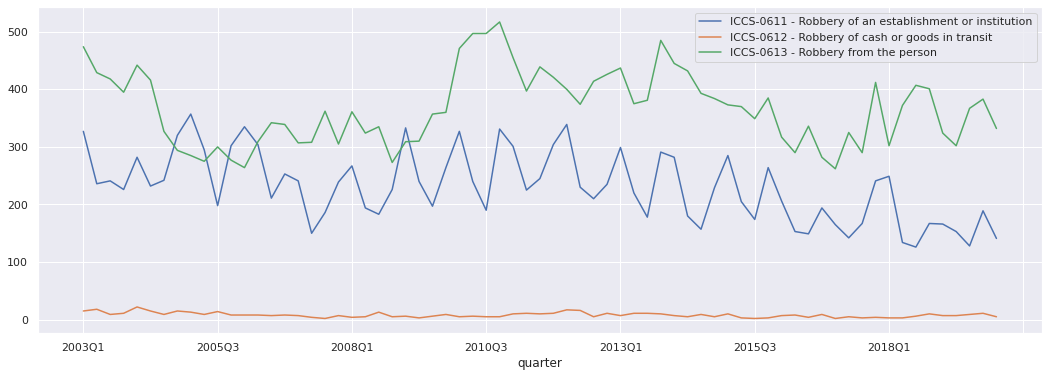

In [216]:
graph_robbery_quarter = robbery_quarter.sum().plot(figsize=(18, 6), grid=True)

Vamos analisar esses mesmos dados de roubo por ano.

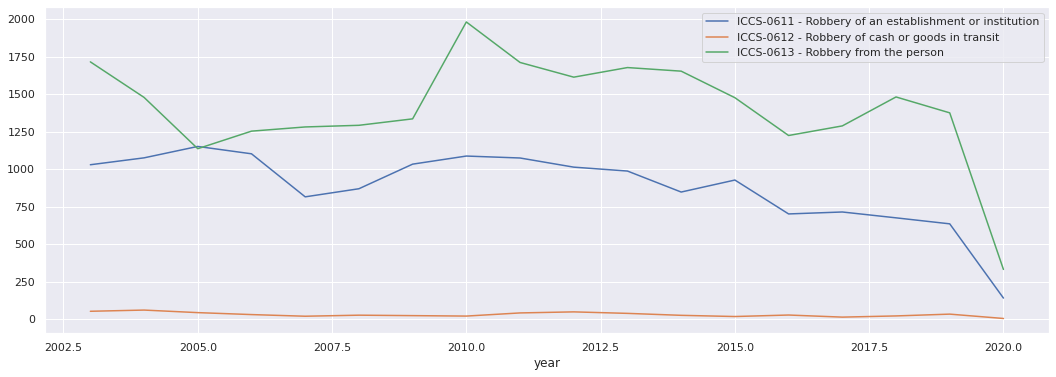

In [217]:
robbery_year = new_df[robbery].groupby(new_df['year'])
graph_robbery_year = robbery_year.sum().plot(figsize=(18, 6), grid=True)

Podemos observar no gráfico acima que os crimes de roubo reduzem bastante no primeiro quadrimestre de 2020, provavelmente devido ao isolamento em função da COVID-19. Podemos observar que o ápice das ocorrências de roubo às pessoas teve seu ponto em meio à crise financeira entre 2008 e 2012. No gráfico de roubos por quadrimestre, observamos que, em três momentos, os assaltos às instituições foram em maior número do que os assaltos à pessoas.

#### **2. Ocorrências de crimes de roubos à pessoas em toda Irlanda, desde 2003 até 2019, anualmente, em números absolutos e para cada 100 habitantes**


Agrupando os dados de roubo às pessoas (ICCS-0613) em toda à Irlanda.

In [218]:
# agrupando os dados de roubo à pessoa (ICCS-0613) por ano
crime = 'ICCS-0613 - Robbery from the person'
robbery_grouped = new_df[crime].groupby(new_df['year'])
df_robbery = robbery_grouped.sum()

In [219]:
df_robbery = df_robbery.reset_index()

In [220]:
df_robbery

,year,ICCS-0613 - Robbery from the person
0,2003,1716.0
1,2004,1479.0
2,2005,1137.0
3,2006,1254.0
4,2007,1282.0
5,2008,1293.0
6,2009,1336.0
7,2010,1982.0
8,2011,1712.0
9,2012,1614.0


In [221]:
df_robbery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   year                                 18 non-null     int64  
 1   ICCS-0613 - Robbery from the person  18 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 416.0 bytes


Juntando esses dados agrupados aos dados de população. Observe que o conjunto de dados de população contem informações desde 1926 até 2019 e o conjunto de dados de crimes contém dados de 2003 ao primeiro quadrimestre de 2020. Ao juntar os dois conjuntos de dados, o faremos de forma que o conjunto de dados resultante não possua valores anteriores à 2003, pois não existem dados de crimes anteriores à 2003. E serão descartados também os dados de 2020, pois não existem dados de população deste ano.

In [222]:
# juntar o dataframe de roubo à pessoas com o dataframe de população. Os anos a mais de qualquer um dos lados serão descartados
df_robbery = pd.merge(df_robbery, population, on='year')
df_robbery

,year,ICCS-0613 - Robbery from the person,population
0,2003,1716.0,3979853
1,2004,1479.0,4045188
2,2005,1137.0,4133839
3,2006,1254.0,4232929
4,2007,1282.0,4375842
5,2008,1293.0,4485070
6,2009,1336.0,4533395
7,2010,1982.0,4554763
8,2011,1712.0,4574888
9,2012,1614.0,4593697


Criando a informação dos dados por 100 habitantes.

In [223]:
# criando uma coluna e inicializando-a
df_robbery['ICCS-0613 - Robbery from the person per 100'] = 0
# calculando e preenchendo os dados da coluna
for index, row in df_robbery.iterrows():
    df_robbery.loc[index, 'ICCS-0613 - Robbery from the person per 100'] = row['ICCS-0613 - Robbery from the person']*100/row['population']
# exibindo os valores 
df_robbery

,year,ICCS-0613 - Robbery from the person,population,ICCS-0613 - Robbery from the person per 100
0,2003,1716.0,3979853,0.043117
1,2004,1479.0,4045188,0.036562
2,2005,1137.0,4133839,0.027505
3,2006,1254.0,4232929,0.029625
4,2007,1282.0,4375842,0.029297
5,2008,1293.0,4485070,0.028829
6,2009,1336.0,4533395,0.029470
7,2010,1982.0,4554763,0.043515
8,2011,1712.0,4574888,0.037422
9,2012,1614.0,4593697,0.035135


Exibindo o gráfico das quantidades de roubos à pessoa na Irlanda, ano a ano.

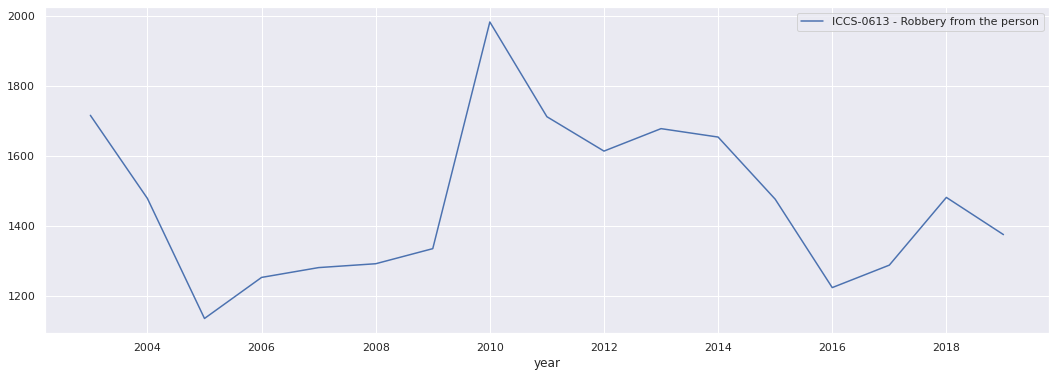

In [224]:
# gráfico utilizando os números absolutos
graph_robbery_abs = df_robbery.plot('year','ICCS-0613 - Robbery from the person', figsize=(18, 6), grid=True)

Exibindo o gráfico dos roubos à pessoas ano a nao, para cada 100 habitantes.

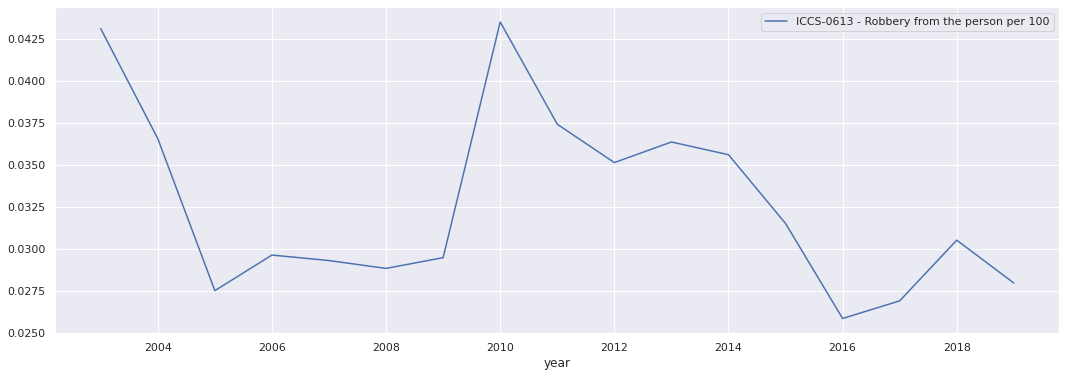

In [225]:
# gráfico utilizando os números relativos
graph_robbery_rel = df_robbery.plot('year','ICCS-0613 - Robbery from the person per 100', figsize=(18, 6), grid=True)

Os gráficos em quantidades absolutas e relativas à cada 100 habitantes não alteram praticamente nada. No entanto, é possível observar que em torno de 2003, a quantidade destes crimes era maior, em valores relativos a quantidade da população na época. Eram tanto quanto o seu pico no meio da crise entre 2008 e 2012.

#### **3. Ocorrência de crimes sexuais em Dublin, no período de 2003 até o primeiro quadrimestre de 2020**



Para esta análise, é necessário filtrar os dados pelas áreas das divisões da Garda que correspondem à Dublin, ou seja, Regiões Metropolitanas Sul Central, Norte Central, Sul, Norte, Leste e Oeste de Dublin.

In [226]:
# Selecionando as divisões de Dublin (começam com "DMR')
divisions = [ area for area in new_df.division.unique().tolist() if 'DMR' in area]
divisions

['DMR South Central',
 'DMR North Central',
 'DMR North',
 'DMR South',
 'DMR East',
 'DMR West']

In [227]:
#selecionando os registros pelas divisões de Dublin
df_dublin = new_df[new_df['division'].isin(divisions)]
df_dublin

,quarter,division,ICCS-01 - Homicide offences,ICCS-0111 - Murder,ICCS-0112 - Manslaughter,ICCS-0113 - Infanticide,ICCS-012 - Dangerous driving leading to death,ICCS-02 - Sexual offences,ICCS-021 - Rape and sexual assault,ICCS-022 - Other sexual offences,"ICCS-03 - Attempts/threats to murder, assaults, harassments and related offences",ICCS-0311 - Murder-attempt,ICCS-0312 - Murder-threat,ICCS-033 - Harassment and related offences,"ICCS-034 - Assault causing harm, poisoning",ICCS-035 - Other assault,ICCS-04 - Dangerous or negligent acts,ICCS-0411 - Dangerous driving causing serious bodily harm,ICCS-0412 - Driving/in charge of a vehicle while over legal alcohol limit,ICCS-0413 - Driving/in charge of a vehicle under the influence of drugs,ICCS-0421 - Endangerment with potential for serious harm/death,"ICCS-0422 - Abandoning a child, child neglect and cruelty",ICCS-0423 - Unseaworthy/dangerous use of boat or ship,ICCS-0424 - False alarm/interference with aircraft or air transport facilities,ICCS-0425 - Endangering traffic offences,ICCS-05 - Kidnapping and related offences,ICCS-0511 - False imprisonment,ICCS-0512 - Abduction of person under 16 years of age,ICCS-0513 - Human trafficking offences,"ICCS-06 - Robbery, extortion and hijacking offences",ICCS-0611 - Robbery of an establishment or institution,ICCS-0612 - Robbery of cash or goods in transit,ICCS-0613 - Robbery from the person,ICCS-0621 - Blackmail or extortion,"ICCS-0631 - Carjacking, hijacking/unlawful seizure of aircraft/vessel",ICCS-07 - Burglary and related offences,ICCS-0711 - Aggravated burglary,ICCS-0712 - Burglary (not aggravated),"ICCS-0713 - Possession of an article (with intent to burgle, steal, demand)",ICCS-08 - Theft and related offences,ICCS-081 - Theft/taking of vehicle and related offences,ICCS-0821 - Theft from person,ICCS-0822 - Theft from shop,"ICCS-084 - Other thefts, handling stolen property","ICCS-09 - Fraud, deception and related offences",ICCS-10 - Controlled drug offences,ICCS-1011 - Importation of drugs,ICCS-1012 - Cultivation or manufacture of drugs,ICCS-1021 - Possession of drugs for sale or supply,ICCS-1022 - Possession of drugs for personal use,ICCS-103 - Other drug offences,ICCS-11 - Weapons and Explosives Offences,"ICCS-111 - Explosives, chemical weapons offences",ICCS-1121 - Discharging a firearm,ICCS-1122 - Possession of a firearm,ICCS-113 - Offensive weapons offences (n.e.c.),ICCS-114 - Fireworks offences,ICCS-12 - Damage to property and to the environment,ICCS-1211 - Arson,ICCS-1212 - Criminal damage (not arson),ICCS-1221 - Litter offences,ICCS-13 - Public order and other social code offences,ICCS-131 - Disorderly conduct,ICCS-132 - Trespass offences,ICCS-133 - Liquor licensing offences,ICCS-134 - Prostitution offences,"ICCS-135 - Regulated betting/money, collection/trading offences",ICCS-136 - Social code offences (n.e.c.),"ICCS-15 - Offences against government, justice procedures and organisation of crime",ICCS-151 - Offences against government and its agents,ICCS-152 - Organisation of crime and conspiracy to commit crime,ICCS-153 - Perverting the course of justice,"ICCS-157 - Offences while in custody, breach of court orders",year
23,2003Q1,DMR South Central,2.0,1.0,1.0,0.0,0.0,13.0,13.0,0.0,198.0,0.0,0.0,10.0,84.0,104.0,121.0,0.0,118.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,155.0,51.0,3.0,98.0,0.0,3.0,574.0,23.0,540.0,11.0,2267.0,243.0,446.0,299.0,1279.0,101.0,95.0,0.0,0.0,56.0,27.0,12.0,55.0,0.0,4.0,4.0,47.0,0.0,571.0,9.0,561.0,1.0,762.0,607.0,56.0,5.0,17.0,12.0,65.0,95.0,1.0,0.0,5.0,89.0,2003
24,2003Q1,DMR North Central,4.0,2.0,1.0,0.0,1.0,38.0,24.0,14.0,175.0,0.0,0.0,11.0,64.0,100.0,90.0,0.0,84.0,0.0,3.0,1.0,0.0,0.0,2.0,3.0,2.0,1.0,0.0,105.0,23.0,0.0,80.0,1.0,1.0,290.0,6.0,268.0,16.0,2068.0,244.0,287.0,655.0,882.0,55.0,71.0,0.0,0.0,50.0,11.0,10.0,49.0,0.0,2.0,4.0,43.0,0.0,552.0,10.0,541.0,1.0,819.0,698.0,34.0,7.0,22.0,12.0,46.0,454.0,1.0,2.0,3.0,448.0,2003
25,2003Q1,DMR North,0.0,0.0,0.0,0.0,0.0,34.0,30.0,4.0,166.0,0.0,0.0,10.0,59

Precisamos selecionar somentes as colunas referentes aos crimes sexuais, que são aqueles cujo ICCS são 021 e 022, ou seja, as colunas se iniciam por 'ICCS-021' ou 'ICCS-022'.

In [228]:
#selecionando as colunas de crimes sexuais
crimes = [crime for crime in df_dublin.columns.tolist() if ('ICCS-021' in crime) or ('ICCS-022' in crime)]
crimes

['ICCS-021 - Rape and sexual assault', 'ICCS-022 - Other sexual offences']

In [229]:
# selecionando somente as colunas year, quarter, division e os dois crimes sexuais
columns = ['year', 'division', 'quarter'] + crimes
columns

['year',
 'division',
 'quarter',
 'ICCS-021 - Rape and sexual assault',
 'ICCS-022 - Other sexual offences']

In [230]:
df_dublin = df_dublin[columns]
df_dublin

,year,division,quarter,ICCS-021 - Rape and sexual assault,ICCS-022 - Other sexual offences
23,2003,DMR South Central,2003Q1,13.0,0.0
24,2003,DMR North Central,2003Q1,24.0,14.0
25,2003,DMR North,2003Q1,30.0,4.0
26,2003,DMR South,2003Q1,36.0,2.0
27,2003,DMR East,2003Q1,15.0,0.0
...,...,...,...,...,...
1996,2020,DMR North Central,2020Q1,20.0,2.0
1997,2020,DMR North,2020Q1,40.0,4.0
1998,2020,DMR South,2020Q1,37.0,5.0
1999,2020,DMR East,2020Q1,20.0,4.0


Vamos agrupar os dados por quadrimestre.

In [231]:
# agrupando por quadrimestre
grouped_quarter = df_dublin[crimes].groupby(df_dublin['quarter'])
grouped_quarter.sum()

,ICCS-021 - Rape and sexual assault,ICCS-022 - Other sexual offences
quarter,,
2003Q1,155.0,20.0
2003Q2,88.0,16.0
2003Q3,125.0,11.0
2003Q4,92.0,8.0
2004Q1,136.0,12.0
...,...,...
2019Q1,238.0,73.0
2019Q2,208.0,35.0
2019Q3,230.0,31.0


Geraremos o gráfico da qauntidade destes crimes por quadrimestre.

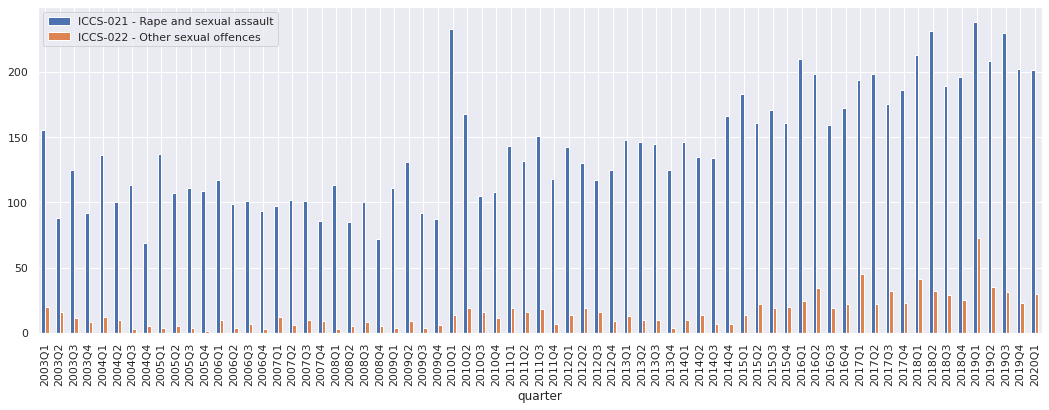

In [232]:
graph_sexual_crimes_quarter = grouped_quarter.sum().plot(figsize=(18, 6), grid=True, kind='bar')

A visualização ficou difícil, vamos ver se melhora ao agrupar os dados por ano e exibí-los no gráfico.

In [233]:
# agrupando por ano
grouped_year = df_dublin[crimes].groupby(df_dublin['year'])
grouped_year.sum()

,ICCS-021 - Rape and sexual assault,ICCS-022 - Other sexual offences
year,,
2003,460.0,55.0
2004,418.0,30.0
2005,464.0,14.0
2006,410.0,24.0
2007,386.0,37.0
2008,370.0,21.0
2009,421.0,23.0
2010,614.0,60.0
2011,544.0,60.0


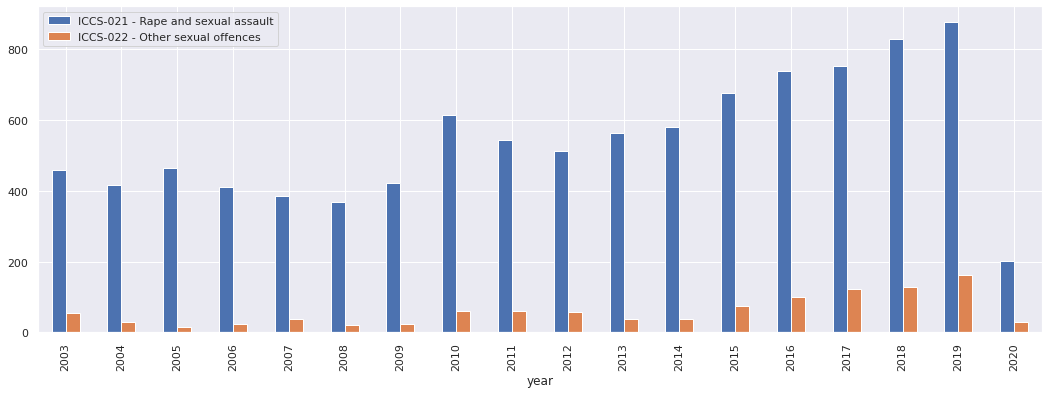

In [234]:
graph_sexual_crimes_year = grouped_year.sum().plot(figsize=(18, 6), grid=True, kind='bar')

O segundo gráfico ficou mais fácil de ser lido. Olhando o gráfico acima, vamos extender a informação e verificar quantas ocorrências de assaltos violentos com estupro ocorreram no primeiro quadrimestre de 2020 em relação à todo o ano de 2019.

In [235]:
val2019 = grouped_quarter.sum().loc['2019Q4'].sum(axis=0)
val2020 = grouped_quarter.sum().loc['2020Q1'].sum(axis=0)
perc = (val2020*100)/val2019
print(f'Percentual de crimes sexuais do primeiro quadrimestre de 2020 em relação à 2019: {perc:.2f}%.')

Percentual de crimes sexuais do primeiro quadrimestre de 2020 em relação à 2019: 102.67%.


O gráfico dos dados por ano exibe um aumento de ocorrências de crimes sexuais desde 2009, apresenta também um valor menor em 2020 por ser uma quantidade referente à somente um quadrimestre, mas não é um número que deve ser ignorado pois, quando comparado ao gráfico por quadrimestre, é perceptível que o número de crimes sexuais permaneceu quase o mesmo do último quadrimestre de 2019, mesmo havendo o [início do isolamento na Irlanda](https://www.irishmirror.ie/news/irish-news/coronavirus-ireland-lockdown-timeline-restrictions-21978302) em março de 2020 por conta da COVID-19. Calculando o percentual de ocorrência de crimes sexuais entre os dois últimos quadrimestres, ou seja, final de 2019 e início de 2020, o gráfico mostra que houve um aumento de quase 3% em relação ao final de 2019. 

#### **4. As divisões da *Garda* onde ocorreram mais crimes relatados nos últimos 12 meses (últimos quatro quadrimestres)**

Há a necessidade de filtrar os dados pelos últimos quatro quadrimestres. 

In [246]:
# selecionando os últimos quatro quadrimestres
df_divisons = new_df.copy()
quarters = ['2019Q2','2019Q3','2019Q4','2020Q1']
df_divisions = new_df[new_df['quarter'].isin(quarters)]
df_divisions

,quarter,division,ICCS-01 - Homicide offences,ICCS-0111 - Murder,ICCS-0112 - Manslaughter,ICCS-0113 - Infanticide,ICCS-012 - Dangerous driving leading to death,ICCS-02 - Sexual offences,ICCS-021 - Rape and sexual assault,ICCS-022 - Other sexual offences,"ICCS-03 - Attempts/threats to murder, assaults, harassments and related offences",ICCS-0311 - Murder-attempt,ICCS-0312 - Murder-threat,ICCS-033 - Harassment and related offences,"ICCS-034 - Assault causing harm, poisoning",ICCS-035 - Other assault,ICCS-04 - Dangerous or negligent acts,ICCS-0411 - Dangerous driving causing serious bodily harm,ICCS-0412 - Driving/in charge of a vehicle while over legal alcohol limit,ICCS-0413 - Driving/in charge of a vehicle under the influence of drugs,ICCS-0421 - Endangerment with potential for serious harm/death,"ICCS-0422 - Abandoning a child, child neglect and cruelty",ICCS-0423 - Unseaworthy/dangerous use of boat or ship,ICCS-0424 - False alarm/interference with aircraft or air transport facilities,ICCS-0425 - Endangering traffic offences,ICCS-05 - Kidnapping and related offences,ICCS-0511 - False imprisonment,ICCS-0512 - Abduction of person under 16 years of age,ICCS-0513 - Human trafficking offences,"ICCS-06 - Robbery, extortion and hijacking offences",ICCS-0611 - Robbery of an establishment or institution,ICCS-0612 - Robbery of cash or goods in transit,ICCS-0613 - Robbery from the person,ICCS-0621 - Blackmail or extortion,"ICCS-0631 - Carjacking, hijacking/unlawful seizure of aircraft/vessel",ICCS-07 - Burglary and related offences,ICCS-0711 - Aggravated burglary,ICCS-0712 - Burglary (not aggravated),"ICCS-0713 - Possession of an article (with intent to burgle, steal, demand)",ICCS-08 - Theft and related offences,ICCS-081 - Theft/taking of vehicle and related offences,ICCS-0821 - Theft from person,ICCS-0822 - Theft from shop,"ICCS-084 - Other thefts, handling stolen property","ICCS-09 - Fraud, deception and related offences",ICCS-10 - Controlled drug offences,ICCS-1011 - Importation of drugs,ICCS-1012 - Cultivation or manufacture of drugs,ICCS-1021 - Possession of drugs for sale or supply,ICCS-1022 - Possession of drugs for personal use,ICCS-103 - Other drug offences,ICCS-11 - Weapons and Explosives Offences,"ICCS-111 - Explosives, chemical weapons offences",ICCS-1121 - Discharging a firearm,ICCS-1122 - Possession of a firearm,ICCS-113 - Offensive weapons offences (n.e.c.),ICCS-114 - Fireworks offences,ICCS-12 - Damage to property and to the environment,ICCS-1211 - Arson,ICCS-1212 - Criminal damage (not arson),ICCS-1221 - Litter offences,ICCS-13 - Public order and other social code offences,ICCS-131 - Disorderly conduct,ICCS-132 - Trespass offences,ICCS-133 - Liquor licensing offences,ICCS-134 - Prostitution offences,"ICCS-135 - Regulated betting/money, collection/trading offences",ICCS-136 - Social code offences (n.e.c.),"ICCS-15 - Offences against government, justice procedures and organisation of crime",ICCS-151 - Offences against government and its agents,ICCS-152 - Organisation of crime and conspiracy to commit crime,ICCS-153 - Perverting the course of justice,"ICCS-157 - Offences while in custody, breach of court orders",year
1886,2019Q2,Cavan/Monaghan,0.0,0.0,0.0,0.0,0.0,21.0,20.0,1.0,183.0,0.0,13.0,19.0,49.0,102.0,132.0,1.0,89.0,37.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,3.0,0.0,96.0,3.0,92.0,1.0,234.0,25.0,0.0,65.0,144.0,53.0,89.0,0.0,2.0,10.0,77.0,0.0,7.0,0.0,2.0,0.0,5.0,0.0,147.0,11.0,131.0,5.0,313.0,290.0,11.0,11.0,0.0,0.0,1.0,68.0,2.0,0.0,0.0,66.0,2019
1887,2019Q2,Donegal,0.0,0.0,0.0,0.0,0.0,35.0,28.0,7.0,223.0,0.0,21.0,24.0,61.0,117.0,121.0,2.0,96.0,19.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,5.0,0.0,0.0,4.0,1.0,0.0,52.0,1.0,51.0,0.0,191.0,13.0,2.0,80.0,96.0,27.0,164.0,3.0,0.0,25.0,135.0,1.0,5.0,0.0,0.0,2.0,3.0,0.0,158.0,23.0,135.0,0.0,359.0,330.0,17.0,5.0,0.0,3.0,4.0,51.0,4.0,0.0,1.0,46.0,2019
1888,2019Q2,Sligo/Leitrim,0.0,0.0,0.0,0.0,0.0,21.0,20.0,1.0,93.0,0.0,5.0,9.0,23.0,56.0,55.0,0.0,44.0,8.0,3.0,0.0,0.0,0.

Como dito anteriormente, existem colunas de crimes mais abrangentes, bem como colunas com crimes mais específicos. Vamos selecionar os mais abrangentes, pois são as somas das crimes específicos, por exemplo: a coluna '*ICCS-01 - Homicide offences*' abrange os totais das colunas '*ICCS-0111 - Murder*', '*ICCS-0112 - Manslaughter*', '*ICCS-0113 - Infanticide*' e '*ICCS-012 - Dangerous driving leading to death*'. 

In [247]:
print(df_divisions.columns.to_list())

['quarter', 'division', 'ICCS-01 - Homicide offences', 'ICCS-0111 - Murder', 'ICCS-0112 - Manslaughter', 'ICCS-0113 - Infanticide', 'ICCS-012 - Dangerous driving leading to death', 'ICCS-02 - Sexual offences', 'ICCS-021 - Rape and sexual assault', 'ICCS-022 - Other sexual offences', 'ICCS-03 - Attempts/threats to murder, assaults, harassments and related offences', 'ICCS-0311 - Murder-attempt', 'ICCS-0312 - Murder-threat', 'ICCS-033 - Harassment and related offences', 'ICCS-034 - Assault causing harm, poisoning', 'ICCS-035 - Other assault', 'ICCS-04 - Dangerous or negligent acts', 'ICCS-0411 - Dangerous driving causing serious bodily harm', 'ICCS-0412 - Driving/in charge of a vehicle while over legal alcohol limit', 'ICCS-0413 - Driving/in charge of a vehicle under the influence of drugs', 'ICCS-0421 - Endangerment with potential for serious harm/death', 'ICCS-0422 - Abandoning a child, child neglect and cruelty', 'ICCS-0423 - Unseaworthy/dangerous use of boat or ship', 'ICCS-0424 - Fa

Vamos criar uma coluna com os valores totais dos crimes mais abrangentes.

In [248]:
df_divisions['total'] = 0
df_divisions['total'] =  df_divisions.filter(regex='ICCS-[0|1][0-9][" "]').sum(axis=1)
df_divisions.head()
#https://living-sun.com/pt/python/698072-pandas-sum-up-multiple-columns-into-one-column-python-pandas-sum.html

,quarter,division,ICCS-01 - Homicide offences,ICCS-0111 - Murder,ICCS-0112 - Manslaughter,ICCS-0113 - Infanticide,ICCS-012 - Dangerous driving leading to death,ICCS-02 - Sexual offences,ICCS-021 - Rape and sexual assault,ICCS-022 - Other sexual offences,"ICCS-03 - Attempts/threats to murder, assaults, harassments and related offences",ICCS-0311 - Murder-attempt,ICCS-0312 - Murder-threat,ICCS-033 - Harassment and related offences,"ICCS-034 - Assault causing harm, poisoning",ICCS-035 - Other assault,ICCS-04 - Dangerous or negligent acts,ICCS-0411 - Dangerous driving causing serious bodily harm,ICCS-0412 - Driving/in charge of a vehicle while over legal alcohol limit,ICCS-0413 - Driving/in charge of a vehicle under the influence of drugs,ICCS-0421 - Endangerment with potential for serious harm/death,"ICCS-0422 - Abandoning a child, child neglect and cruelty",ICCS-0423 - Unseaworthy/dangerous use of boat or ship,ICCS-0424 - False alarm/interference with aircraft or air transport facilities,ICCS-0425 - Endangering traffic offences,ICCS-05 - Kidnapping and related offences,ICCS-0511 - False imprisonment,ICCS-0512 - Abduction of person under 16 years of age,ICCS-0513 - Human trafficking offences,"ICCS-06 - Robbery, extortion and hijacking offences",ICCS-0611 - Robbery of an establishment or institution,ICCS-0612 - Robbery of cash or goods in transit,ICCS-0613 - Robbery from the person,ICCS-0621 - Blackmail or extortion,"ICCS-0631 - Carjacking, hijacking/unlawful seizure of aircraft/vessel",ICCS-07 - Burglary and related offences,ICCS-0711 - Aggravated burglary,ICCS-0712 - Burglary (not aggravated),"ICCS-0713 - Possession of an article (with intent to burgle, steal, demand)",ICCS-08 - Theft and related offences,ICCS-081 - Theft/taking of vehicle and related offences,ICCS-0821 - Theft from person,ICCS-0822 - Theft from shop,"ICCS-084 - Other thefts, handling stolen property","ICCS-09 - Fraud, deception and related offences",ICCS-10 - Controlled drug offences,ICCS-1011 - Importation of drugs,ICCS-1012 - Cultivation or manufacture of drugs,ICCS-1021 - Possession of drugs for sale or supply,ICCS-1022 - Possession of drugs for personal use,ICCS-103 - Other drug offences,ICCS-11 - Weapons and Explosives Offences,"ICCS-111 - Explosives, chemical weapons offences",ICCS-1121 - Discharging a firearm,ICCS-1122 - Possession of a firearm,ICCS-113 - Offensive weapons offences (n.e.c.),ICCS-114 - Fireworks offences,ICCS-12 - Damage to property and to the environment,ICCS-1211 - Arson,ICCS-1212 - Criminal damage (not arson),ICCS-1221 - Litter offences,ICCS-13 - Public order and other social code offences,ICCS-131 - Disorderly conduct,ICCS-132 - Trespass offences,ICCS-133 - Liquor licensing offences,ICCS-134 - Prostitution offences,"ICCS-135 - Regulated betting/money, collection/trading offences",ICCS-136 - Social code offences (n.e.c.),"ICCS-15 - Offences against government, justice procedures and organisation of crime",ICCS-151 - Offences against government and its agents,ICCS-152 - Organisation of crime and conspiracy to commit crime,ICCS-153 - Perverting the course of justice,"ICCS-157 - Offences while in custody, breach of court orders",year,total
1886,2019Q2,Cavan/Monaghan,0.0,0.0,0.0,0.0,0.0,21.0,20.0,1.0,183.0,0.0,13.0,19.0,49.0,102.0,132.0,1.0,89.0,37.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,3.0,0.0,96.0,3.0,92.0,1.0,234.0,25.0,0.0,65.0,144.0,53.0,89.0,0.0,2.0,10.0,77.0,0.0,7.0,0.0,2.0,0.0,5.0,0.0,147.0,11.0,131.0,5.0,313.0,290.0,11.0,11.0,0.0,0.0,1.0,68.0,2.0,0.0,0.0,66.0,2019,1347.0
1887,2019Q2,Donegal,0.0,0.0,0.0,0.0,0.0,35.0,28.0,7.0,223.0,0.0,21.0,24.0,61.0,117.0,121.0,2.0,96.0,19.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,5.0,0.0,0.0,4.0,1.0,0.0,52.0,1.0,51.0,0.0,191.0,13.0,2.0,80.0,96.0,27.0,164.0,3.0,0.0,25.0,135.0,1.0,5.0,0.0,0.0,2.0,3.0,0.0,158.0,23.0,135.0,0.0,359.0,330.0,17.0,5.0,0.0,3.0,4.0,51.0,4.0,0.0,1.0,46.0,2019,1392.0
1888,2019Q2,Sligo/Leitrim,0.0,0.0,0.0,0.0,0.0,21.0,20.0,1.0,93.0,0.0,5.0,9.0,23.0,56.0,55.0,0.0,44.

Vamos filtrar somente os crimes mais abrangentes.

In [249]:
iccs = df_divisions.filter(regex='ICCS-[0|1][0-9][" "]').columns.to_list()
columns=['division', 'total']
columns = columns + iccs
print(columns)

['division', 'total', 'ICCS-01 - Homicide offences', 'ICCS-02 - Sexual offences', 'ICCS-03 - Attempts/threats to murder, assaults, harassments and related offences', 'ICCS-04 - Dangerous or negligent acts', 'ICCS-05 - Kidnapping and related offences', 'ICCS-06 - Robbery, extortion and hijacking offences', 'ICCS-07 - Burglary and related offences', 'ICCS-08 - Theft and related offences', 'ICCS-09 - Fraud, deception and related offences', 'ICCS-10 - Controlled drug offences', 'ICCS-11 - Weapons and Explosives Offences', 'ICCS-12 - Damage to property and to the environment', 'ICCS-13 - Public order and other social code offences', 'ICCS-15 - Offences against government, justice procedures and organisation of crime']


In [250]:
df_divisions = df_divisions[columns]
df_divisions.head()

,division,total,ICCS-01 - Homicide offences,ICCS-02 - Sexual offences,"ICCS-03 - Attempts/threats to murder, assaults, harassments and related offences",ICCS-04 - Dangerous or negligent acts,ICCS-05 - Kidnapping and related offences,"ICCS-06 - Robbery, extortion and hijacking offences",ICCS-07 - Burglary and related offences,ICCS-08 - Theft and related offences,"ICCS-09 - Fraud, deception and related offences",ICCS-10 - Controlled drug offences,ICCS-11 - Weapons and Explosives Offences,ICCS-12 - Damage to property and to the environment,ICCS-13 - Public order and other social code offences,"ICCS-15 - Offences against government, justice procedures and organisation of crime"
1886,Cavan/Monaghan,1347.0,0.0,21.0,183.0,132.0,0.0,4.0,96.0,234.0,53.0,89.0,7.0,147.0,313.0,68.0
1887,Donegal,1392.0,0.0,35.0,223.0,121.0,1.0,5.0,52.0,191.0,27.0,164.0,5.0,158.0,359.0,51.0
1888,Sligo/Leitrim,861.0,0.0,21.0,93.0,55.0,0.0,4.0,62.0,192.0,20.0,60.0,14.0,103.0,206.0,31.0
1889,Louth,1710.0,0.0,25.0,191.0,60.0,0.0,27.0,129.0,502.0,53.0,165.0,32.0,199.0,233.0,94.0
1890,Clare,861.0,0.0,19.0,103.0,50.0,3.0,4.0,52.0,208.0,36.0,89.0,12.0,105.0,146.0,34.0


Precisamos agrupar os totais por divisões da Garda.

In [251]:
grouped = df_divisions.groupby(df_divisions.division)
df_divisions = grouped.sum()
df_divisions.head()

,total,ICCS-01 - Homicide offences,ICCS-02 - Sexual offences,"ICCS-03 - Attempts/threats to murder, assaults, harassments and related offences",ICCS-04 - Dangerous or negligent acts,ICCS-05 - Kidnapping and related offences,"ICCS-06 - Robbery, extortion and hijacking offences",ICCS-07 - Burglary and related offences,ICCS-08 - Theft and related offences,"ICCS-09 - Fraud, deception and related offences",ICCS-10 - Controlled drug offences,ICCS-11 - Weapons and Explosives Offences,ICCS-12 - Damage to property and to the environment,ICCS-13 - Public order and other social code offences,"ICCS-15 - Offences against government, justice procedures and organisation of crime"
division,,,,,,,,,,,,,,,
Cavan/Monaghan,5366.0,0.0,81.0,715.0,458.0,6.0,21.0,434.0,968.0,222.0,354.0,45.0,573.0,1222.0,267.0
Clare,3347.0,0.0,51.0,422.0,184.0,7.0,22.0,232.0,795.0,165.0,329.0,52.0,436.0,493.0,159.0
Cork City,11641.0,6.0,172.0,1301.0,346.0,9.0,142.0,480.0,3668.0,329.0,1040.0,155.0,1225.0,2215.0,553.0
Cork North,4582.0,2.0,81.0,633.0,358.0,1.0,11.0,220.0,901.0,171.0,611.0,69.0,409.0,910.0,205.0
Cork West,2466.0,1.0,49.0,332.0,277.0,2.0,6.0,97.0,363.0,110.0,329.0,16.0,277.0,523.0,84.0


In [254]:
df_divisions = df_divisions.reset_index()

Juntaremos o conjunto de dados de crimes com a geometria.

In [255]:
merged = shapefile.set_index('DIVISION').join(df_divisions.set_index('division'))
merged.head()

,REGION,REG_CODE,DIV_CODE,GEOGID,CREATEDBY,CREATEDATE,geometry,total,ICCS-01 - Homicide offences,ICCS-02 - Sexual offences,"ICCS-03 - Attempts/threats to murder, assaults, harassments and related offences",ICCS-04 - Dangerous or negligent acts,ICCS-05 - Kidnapping and related offences,"ICCS-06 - Robbery, extortion and hijacking offences",ICCS-07 - Burglary and related offences,ICCS-08 - Theft and related offences,"ICCS-09 - Fraud, deception and related offences",ICCS-10 - Controlled drug offences,ICCS-11 - Weapons and Explosives Offences,ICCS-12 - Damage to property and to the environment,ICCS-13 - Public order and other social code offences,"ICCS-15 - Offences against government, justice procedures and organisation of crime"
DIVISION,,,,,,,,,,,,,,,,,,,,,,
Galway,Western Region,02,0223,K0223,Paul Creaner,30-11-2013,"POLYGON ((202234.404 219542.771, 202195.208 21...",8193.0,0.0,167.0,978.0,419.0,3.0,52.0,573.0,2131.0,358.0,538.0,91.0,861.0,1724.0,298.0
DMR East,Dublin Metropolitan Region,06,0605,K0605,Paul Creaner,30-11-2013,"POLYGON ((320587.313 230164.757, 320666.241 23...",8331.0,2.0,94.0,532.0,180.0,2.0,94.0,1091.0,3381.0,393.0,534.0,98.0,788.0,772.0,370.0
DMR North,Dublin Metropolitan Region,06,0607,K0607,Paul Creaner,30-11-2013,"POLYGON ((316466.866 266374.324, 316474.719 26...",17056.0,6.0,183.0,1600.0,444.0,20.0,327.0,1485.0,6537.0,571.0,1679.0,247.0,2009.0,1372.0,576.0
DMR North Central,Dublin Metropolitan Region,06,0606,K0606,Paul Creaner,30-11-2013,"POLYGON ((313859.604 237706.826, 313881.264 23...",21365.0,2.0,119.0,1255.0,275.0,3.0,262.0,671.0,7104.0,644.0,1465.0,263.0,1130.0,2665.0,5507.0
DMR South,Dublin Metropolitan Region,06,0609,K0609,Paul Creaner,30-11-2013,"POLYGON ((314937.375 232406.559, 315083.305 23...",12923.0,2.0,173.0,938.0,359.0,5.0,251.0,1360.0,4440.0,501.0,1407.0,175.0,1505.0,1233.0,574.0


Criando e exibindo o gráfico referente a todos os crimes por divisões.

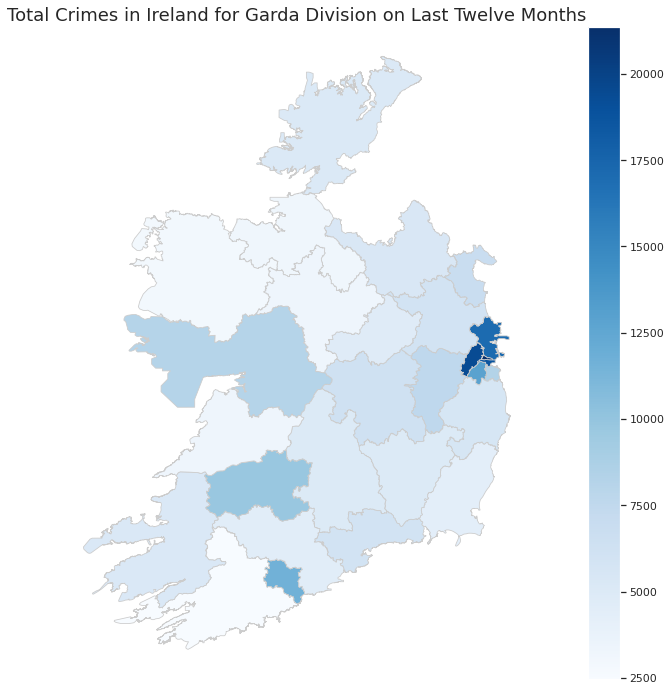

In [256]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'total'
# set the range for the choropleth
vmin, vmax = merged.total.min(), merged.total.max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 12))
# add a title
ax.set_title('Total Crimes in Ireland for Garda Division on Last Twelve Months', fontdict={'fontsize': '18', 'fontweight' : '3'})
# remove the axis
ax.axis('off')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')


O maior número de ocorrências registradas acontecem na Região Metropolitânea de Dublin, com ênfase nas porções Centrais e Leste. Vamos analisar os gráficos de homicídios no mesmo período.

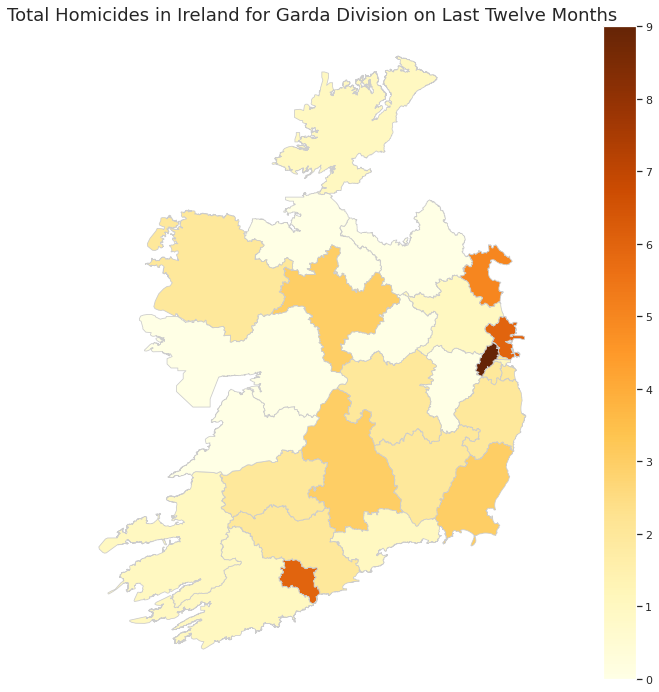

In [257]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'ICCS-01 - Homicide offences'
# set the range for the choropleth
vmin, vmax = merged[variable].min(), merged[variable].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 12))
# add a title
ax.set_title('Total Homicides in Ireland for Garda Division on Last Twelve Months', fontdict={'fontsize': '18', 'fontweight' : '3'})
# remove the axis
ax.axis('off')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='YlOrBr', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
# create map
merged.plot(column=variable, cmap='YlOrBr', linewidth=0.8, ax=ax, edgecolor='0.8')

Podemos observar que os homicídios, nos útimos 12 meses, teve maiores ocorrências a porção Leste da Região Metropolitânea Central, seguida das demais áreas da Região Metropolitânea, em Cork City e Louth. Para trabalhos futuros, podemos sugerir uma visualização interativa de cada crime registrado por divisões.

## **Conclusão**
O tempo disponível para este projeto limitou a abrangência do trabalho, cuja expansão fica como sugestão para atividades futuros. <br>
Para a confecção deste projeto, ficou clara a importância da definição do problema inicialmente para depois buscar os dados necessários, a exploração dos dados para eliminação de informações desnecessárias para o estudo, bem como a correção de cabeçalhos, índices e valores de campos. É importante também observar que é comum a análise baseada em mais de um conjunto de dados, fazendo a ligação entre eles. Não menos importante é a visualização dos dados, pois nem sempre uma forma de exibi-los traz a informação necessária ao estudo. No entanto, uma boa visualização pode levar a necessidade de trabalhos futuros mais detalhados.<br> 
Para um estudo melhor dos códigos apresentados, disponibilizo este projeto no[Google Colab](https://colab.research.google.com/drive/1Wh3jbLOuNuSAsflM8j0gD-5wkblB2mQQ?usp=sharing).<br>
 Caso você tenha gostado deste artigo, convido-o a conectar-se comigo  através do [meu linkedin](https://www.linkedin.com/in/gustavo-pierre/) ou acessar [meu portfolio no github](https://github.com/gustavopierre/data_science_portfolio) para visualizar outros artigos.

## Referências
* 2011 Census Boundaries. Central Statistics Office (CSO). Disponível em: <http://census.cso.ie/censusasp/saps/boundaries/ED_SA%20Disclaimer1.htm>. Acesso em: 29 jun. 2020.

* Ávany França. A Irlanda já não é mais a mesma.  Disponível em: <https://www.e-dublin.com.br/a-irlanda-ja-nao-e-mais-a-mesma/>. Acesso em: 28 jun. 2020.

* Census 2011 Boundary Files. Central Statistcs Office (CSO). Disponível em: <https://www.cso.ie/en/census/census2011boundaryfiles/>. Acesso em: 03 jul. 2020.

* Central Statistics Office (CSO). Disponível em: <https://www.cso.ie/en/>. Acesso em: 29 jun. 2020.

* Existing Garda Divisions. ArcGis. Disponível em:<https://www.arcgis.com/home/webmap/viewer.html?layers=5a299226266147a28ab991e8775b1226>. Acesso em: 12 jun. 2020.

* Garda Síochána. Wikipedia. Disponível em: <https://en.wikipedia.org/wiki/Garda_S%C3%ADoch%C3%A1na>. Acesso em: 29 jun. 2020.

* GIS at UCD and on the Web: Find Spatial Data & Other Datasets for Ireland. UCD Library. Disponível em: <https://libguides.ucd.ie/gisguide/FindSpatialData>. Acesso em: 29 jun. 2020.

* Ian Mangan. When did lockdown in Ireland start? Timeline of coronavirus restrictions as measures are eased. Disponível em: <https://www.irishmirror.ie/news/irish-news/coronavirus-ireland-lockdown-timeline-restrictions-21978302>. Acesso em: 12 jul. 2020.

* Ireland's Open Data Portal. Disponível em: <https://data.gov.ie/>. Acesso em: 29 jun. 2020.

* Irish Crime Classification System (ICCS). Central Statistcs Office (CSO). Disponível em: <https://www.cso.ie/en/media/csoie/releasespublications/documents/crimejustice/current/crimeclassification.pdf>. Acesso em: 04 jul. 2020.

* Irlanda. Wikipedia. Disponível em: <https://pt.wikipedia.org/wiki/Irlanda>. Acesso em: 28 jun. 2020.

* Mobasshir Bhuiyan. Stack Exchange Network. How to read a shapefile in Python?. Disponível em: <https://gis.stackexchange.com/questions/113799/how-to-read-a-shapefile-in-python>. Acesso em: 29 jun. 2020.

* Reading Spatial Data. Geopandas Documentation. Disponível em: <https://geopandas.org/io.html?highlight=shapefile>. Acesso em: 29 jun. 2020.

* Recorded Crime Offences Under Reservation by Garda Region, Type of Offence and Quarter. Central Statistics Office (CSO). Disponível em: <https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?MainTable=CJQ05&TabStrip=Select&PLanguage=0&FF=1>. Acesso em: 29 jun. 2020.











